# Properties Arcsine Distribution.

The wave divisor function consists of a pulse outline modulated with a high frequency component. The real solution of the wave divisor function is:

$$\large \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

N is determined by the pulse width setting and calculated with:

$$\large N(\mathbb{X}) \approx \lim_{\mathbb{X} \rightarrow \infty}     \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} = - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} $$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information). This linear dependance will result in a arcsine distribution only if the divisors at $\sigma(x-1)$ and $\sigma(x+1)$ are random distributed, which is supposed true for large numbers. Note that $N(\mathbb{X})$ also is a randomizing factor while it's rounded to it's closest even number. 

$$\large HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} \right) \approx \cos (\alpha \mathbb{X})$$

$$\large \alpha = - \frac{2 \space \log(L)}{\pi \space \Delta x^{2}}=constant$$

The are two simulations in this document. The first simulation is the arcsine distribution for values of $L$ and $dx$. Second there is also a case where resonation occurs here $\alpha=k \pi$. In the simulations N is calulated with it's original definition not it's approximation / limit value.

More information: [pdf Google Drive][1]

[1]: https://drive.google.com/open?id=10p06BBJtKVcreHfzzbF--a47fR_lbW_h

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

import numpy as np

from IPython.display import display

In [2]:
%matplotlib notebook

# Simulation 1, Arcsine Distribution $L$ and $\Delta x$.

The distribution is plotted for $\mathbb{X}=2$ till $\mathbb{X}=200000$. The various pulsewidth settings can be selected. The arcsine distribution appears homogene. Though when zooming in (on linear scale) one can observe local resonation at some values of $\mathbb{X}$. Though when numbers get larger the arcsine distribution dominates.

<IPython.core.display.Javascript object>


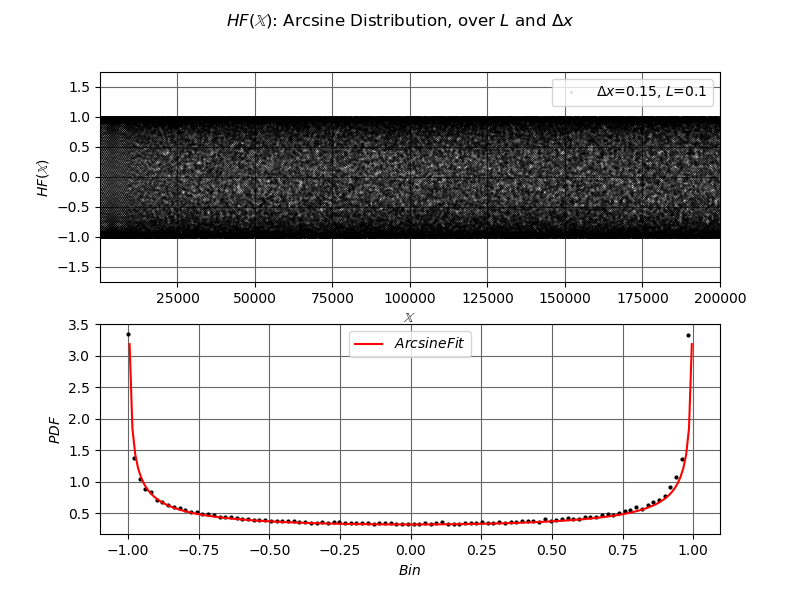

Selected the pulse width by: L and dx.


interactive(children=(Dropdown(description='$\\Delta x$:', index=3, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [3]:
fig, axs = plt1.subplots(2,1,figsize=(8, 6))
plt1.suptitle('$HF(\mathbb{X})$: Arcsine Distribution, over $L$ and $\Delta x$')

#Detemrine aircsine distribution fit
arcsinx=np.linspace(-0.995,0.995,200)
arcsine=1/(np.pi*np.sqrt((1-arcsinx**2)))

def update_plot(dx, L,xscale):

    axs[0].clear()
    axs[1].clear()
    
    #Plot high frequency point cos(pi*N/X), N rounded to closest even
    x = np.linspace(1,200000,200000)
    N=2*np.round(0.5*(np.log(L)/(np.log(np.cos(np.pi*dx/x)))),0)
    y = np.cos(np.pi*N/x)
    axs[0].axis([1,200000, -1.75 , 1.75])
    units4 = '$\Delta x$={}, $L$={}'
    
    if xscale=='lin':
        axs[0].plot(x, y, color='black', marker='.', markersize=0.25,linestyle='' ,label=units4.format(dx, L))
    else:
        axs[0].semilogx(x, y, color='black', marker='.', markersize=0.25,linestyle='' ,label=units4.format(dx, L))
    
    axs[0].legend(loc=1)
    axs[0].set_xlabel('$\mathbb{X}$')
    axs[0].set_ylabel('$HF(\mathbb{X})$')
    axs[0].grid(b=True, which='major', color='#666666', linestyle='-')
    
    #Determine histogram normalized
    bins=np.linspace(-1,1,100)
    y1,x1=np.histogram(y,bins=bins)
    y2=y1/(np.pi*y1[50])
    axs[1].plot(x1[:-1], y2, color='black', marker='o', linestyle='', markersize=2)
   
    #Plot arcsine distribution fit.
    axs[1].set_xlabel('$Bin$')
    axs[1].set_ylabel('$PDF$')
    axs[1].plot(arcsinx, arcsine, color='red', marker='', linestyle='-',label='$Arcsine Fit$')
    axs[1].legend(loc=0)
    axs[1].grid(b=True, which='major', color='#666666', linestyle='-')
               
    plt1.show()

print('Selected the pulse width by: L and dx.')
   
dx = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.25, description='$\Delta x$:') 
#dx = widgets.BoundedFloatText(value=0.5, description='$\delta x$:') 
L = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
xscale=widgets.Dropdown(options=['lin','log'],value='lin',description='$x scale$:')


widgets.interactive(update_plot, dx=dx, L=L, xscale=xscale)

# Simulation 2, Arcsine Resonation Distribution $L$ and $\alpha = k \pi$.

Resonation can occur in the arcsine distribution. We can determine the value $\Delta x$ for the resonation factor $k$:

$$\Large \Delta x = \sqrt{- \frac{2 \log(L)}{k \pi^{2}} }$$

The distribution is plotted for $\mathbb{X}=2$ till $\mathbb{X}=300000$. Various resonation factors $k$ can be selected. Resonation only occures in the lower range of $\mathbb{X}$. For larger values of $\mathbb{X}$ the arcsine distribution appears to dominate.


<IPython.core.display.Javascript object>


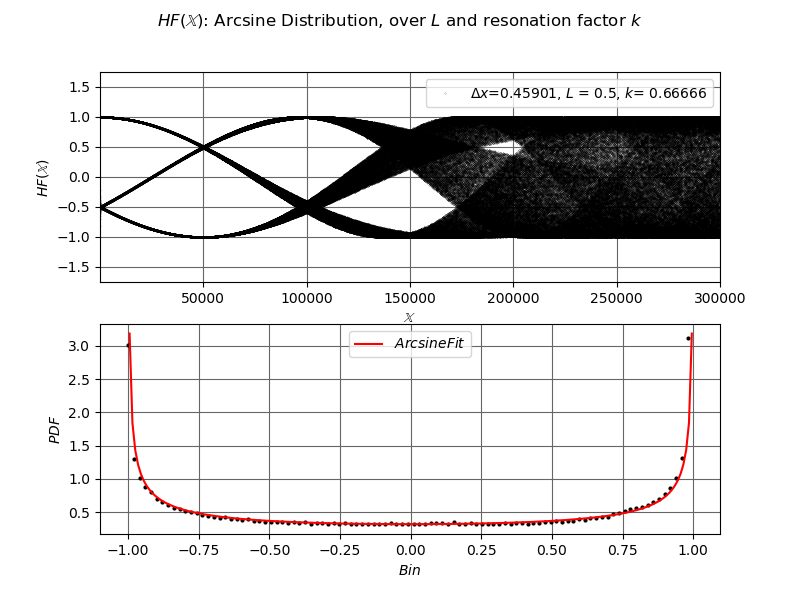

Select: resonation factor k and pulsewidth L.
Small values of k result in broad pulsewidths dx>>.
Large values of k result in narrow pulsewidths dx<<

Example of k: 0.50, 0.75, 1, 1.125, 1.33333..., 2.1111111... , etc


interactive(children=(BoundedFloatText(value=0.66666, description='$k$:'), Dropdown(description='$L$:', index=…

In [4]:
fig, axs2 = plt2.subplots(2,1,figsize=(8, 6))
plt2.suptitle('$HF(\mathbb{X})$: Arcsine Distribution, over $L$ and resonation factor $k$')

#Detemrine aircsine distribution fit
arcsinx2=np.linspace(-0.995,0.995,200)
arcsine2=1/(np.pi*np.sqrt((1-arcsinx**2)))

def update_plot(k2, L2,xscale2):

    axs2[0].clear()
    axs2[1].clear()
    
    #Calculate dx from resonation factor k
    dx2=np.sqrt(-2*np.log(L2)/(k2*np.pi**2))
    
    print('dx: ' + str(dx2))
    
    #Plot high frequency point cos(pi*N/X), N rounded to closest even
    x2 = np.linspace(1,300000,300000)
    N2=2*np.round(0.5*(np.log(L2)/(np.log(np.cos(np.pi*dx2/x2)))),0)
    y2 = np.cos(np.pi*N2/x2)
    axs2[0].axis([1,300000, -1.75 , 1.75])
    units5 = '$\Delta x$={}, $L$ = {}, $k$= {}'
    
    if xscale2=='lin':
        axs2[0].plot(x2, y2, color='black', marker='.', markersize=0.25,linestyle='' ,label=units5.format(np.round(dx2,5), L2, k2))
    else:
        axs2[0].semilogx(x2, y2, color='black', marker='.', markersize=0.25,linestyle='' ,label=units5.format(np.round(dx2,5), L2 ,k2))
    
    axs2[0].legend(loc=1)
    axs2[0].set_xlabel('$\mathbb{X}$')
    axs2[0].set_ylabel('$HF(\mathbb{X})$')
    axs2[0].grid(b=True, which='major', color='#666666', linestyle='-')
    
    #Determine histogram normalized
    bins2=np.linspace(-1,1,100)
    y3,x3=np.histogram(y2,bins=bins2)
    y4=y3/(np.pi*y3[50])
    axs2[1].plot(x3[:-1], y4, color='black', marker='o', linestyle='', markersize=2)
   
    #Plot arcsine distribution fit.
    axs2[1].set_xlabel('$Bin$')
    axs2[1].set_ylabel('$PDF$')
    axs2[1].plot(arcsinx2, arcsine2, color='red', marker='', linestyle='-',label='$Arcsine Fit$')
    axs2[1].legend(loc=0)
    axs2[1].grid(b=True, which='major', color='#666666', linestyle='-')
               
    plt2.show()

print('Select: resonation factor k and pulsewidth L.')
print('Small values of k result in broad pulsewidths dx>>.')
print('Large values of k result in narrow pulsewidths dx<<')
print('')
print('Example of k: 0.50, 0.75, 1, 1.125, 1.33333..., 2.1111111... , etc')
   
#k = widgets.Dropdown(options=[0.40,0.50, 0.60,0.70,0.75,0.80,0.9,1.0,0.45,0.5], value=0.25, description='$\Delta x$:') 
k2 = widgets.BoundedFloatText(value=0.66666, description='$k$:') 
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
xscale2=widgets.Dropdown(options=['lin','log'],value='lin',description='$x scale$:')

widgets.interactive(update_plot, k2=k2, L2=L2, xscale2=xscale2)